In [2]:
#pip install Pillow
#pip install pytesseract
#pip install nltk

In [3]:
from PIL import Image 
import pytesseract 
import numpy as np
import pandas as pd
import re 
import nltk
from nltk.tokenize import word_tokenize
from os import listdir
from os.path import isfile, join

In [4]:
path = '/Users/paulo.silva/Desktop/imagens_comprovantes/'
files = [f for f in listdir(path) if isfile(join(path, f))]

In [5]:
def clean_data(text):
    text = text.lower() 
    text = re.findall(r'[a-zéóáêâãõç]+', text)
    text = " ".join(text)
    return text

In [8]:
from PIL import Image 

def convert_image(path):
    image_file = Image.open(path) # open colour image
    image_file = image_file.convert('1') # convert image to black and white
    #image_file.save('/Users/paulo.silva/Desktop/imagens_comprovantes/result_colorido1.png')
    return image_file

def convert_image2(path):
    img = Image.open(path)
    thresh = 200
    fn = lambda x : 255 if x > thresh else 0
    r = img.convert('L').point(fn, mode='1')
    return r

import cv2 
def binary(path):
    img = cv2.imread(path, 2) 

    ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
    bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 

    cv2.imshow("Binary", bw_img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
    return bw_img

In [10]:
texts_array = []
Vocab = []
for f in files:
    try:
        #img_bw = binary(path+f)
        #text_from_img = pytesseract.image_to_string(img_bw )
        #text_from_img = pytesseract.image_to_string( convert_image(path+f))
        text_from_img = pytesseract.image_to_string( Image.open(path+f))
        cleaned_text = clean_data(text_from_img)
        texts_array.append(cleaned_text)
        #creating a vocabulary fo words
        tokens = word_tokenize(str(texts_array))
        for text in texts_array:
            tokens = word_tokenize(text)
            for token in tokens:
                # there are many value with only 2 caracteres, here I remove them from vocabulary and len(token) > 2
                if token not in Vocab and len(token) > 2 :
                    Vocab.append(token)
    except:
        print("error:"+f)

print('TEXTOS DAS IMAGENS'+'/n')        
print(texts_array)
print('/n')  
print('VOCABULARIO'+'/n' + "Quantidade de colunas:" + str(len(Vocab)))        
print(Vocab)

error:.DS_Store
TEXTOS DAS IMAGENS/n
['vr lualxa economica federal sac ouvidorta gama mar ay e aa local idade curttiba ag vinoulada rahi a ee ex g i wander file irr content valor deposi to realtzado com sucessd af go credito na conta oe al e', '', 'san der pagamento realizado com sucesso forma de pagamento débito em conta agéncia conta corrente cédigo de barras data de vencimento pagamento banco caixa economica federal valor nominal rs encargos rs descontos rs valor pago rs nome do beneficidrio condominio residencial barriga verde documento do beneficiario nome do pagador final princiani rodrigues de lima documento do pagador final data da transagao autenticacdo bancaria mbb e ca d central de atendimento santander capitais e regides metropolitanas demais localidades sac ouvidoria', 'santander comprovante do pagamento valor pago r forma de pagamento ag pp dados do recebedor para marina pereira chave cpf instituigao nu pagamentos s a dados do pagador de paulo henrique da silva cpf instit

In [11]:
def bag_of_words_to_dic(vocab, documento):
  
    dic = dict.fromkeys(vocab, 0)
    for palavra in documento:
        if palavra in dic:
            dic[palavra] += 1

    return dic

In [12]:
#a diferenca do dicionario de contagem é que normaliza, divide pela quantidade de palavras no doc
def calculaTF(dic_de_cont, doc):     
    
    tf_dic = {}
    
    num_palavras_doc = len(doc)     
    for palavra, contagem in dic_de_cont.items():
        if num_palavras_doc != 0:    
            tf_dic[palavra] = contagem/float(num_palavras_doc)     
        else:
            tf_dic[palavra] = 0
            
    return(tf_dic)

In [13]:
e_dict_cont = []
calculated_tf_array = []

for text in texts_array:
    words = text.split()  
    dic = bag_of_words_to_dic(Vocab, words)
    e_dict_cont.append(dic)
    calculated_tf_array.append(calculaTF(dic, words))
    
#print(e_dict_cont)

In [14]:
bow_df = pd.DataFrame(e_dict_cont)

In [15]:
bow_df[['banco','pagamento','valor',
        'deposi','débito','agéncia','vencimento','pagador', 'agencia' 
        ,'comprovante', 'pagamentos','total','ted', 'extrato', 'extrato','crédito',
        'pix', 'transacao', 'doc','dinheiro']]




,banco,pagamento,valor,deposi,débito,agéncia,vencimento,pagador,agencia,comprovante,pagamentos,total,ted,extrato,extrato,crédito,pix,transacao,doc,dinheiro
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,2,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,1,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1


In [16]:
bow_df.to_csv('/Users/paulo.silva/Desktop/imagens_comprovantes/bow.csv')

In [17]:
tf_dataframe = pd.DataFrame(calculated_tf_array)
tf_dataframe[['banco','pagamento','valor',
        'deposi','débito','agéncia','vencimento','pagador', 'agencia' 
        ,'comprovante', 'pagamentos','total','ted', 'extrato', 'extrato','crédito',
        'pix', 'transacao', 'doc','dinheiro']]


,banco,pagamento,valor,deposi,débito,agéncia,vencimento,pagador,agencia,comprovante,pagamentos,total,ted,extrato,extrato,crédito,pix,transacao,doc,dinheiro
0,0.000000,0.000000,0.025000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.012658,0.037975,0.025316,0.000000,0.012658,0.012658,0.012658,0.025316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.058824,0.019608,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.039216,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.041667,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.020833


In [18]:
import math

def getIDF(lista_de_docs):
    idf_dic = {}
    N = len(lista_de_docs)

    for palavra in lista_de_docs[0]:
        num_docs_aparece = 0
        for doc in lista_de_docs:
            if doc[palavra]>0:
                num_docs_aparece += 1
        
        idf_dic[palavra] = math.log10(N / (num_docs_aparece))

    return (idf_dic)

In [19]:
docs_idf = getIDF(e_dict_cont)

In [20]:
docs_idf

{'lualxa': 1.3010299956639813,
 'economica': 0.8239087409443188,
 'federal': 0.8239087409443188,
 'sac': 0.6989700043360189,
 'ouvidorta': 1.0,
 'gama': 1.3010299956639813,
 'mar': 1.3010299956639813,
 'local': 1.0,
 'idade': 1.3010299956639813,
 'curttiba': 1.3010299956639813,
 'vinoulada': 1.3010299956639813,
 'rahi': 1.3010299956639813,
 'wander': 1.3010299956639813,
 'file': 1.3010299956639813,
 'irr': 1.3010299956639813,
 'content': 1.3010299956639813,
 'valor': 0.3467874862246563,
 'deposi': 1.0,
 'realtzado': 1.3010299956639813,
 'com': 0.6020599913279624,
 'sucessd': 1.3010299956639813,
 'credito': 0.8239087409443188,
 'conta': 0.4559319556497244,
 'san': 1.3010299956639813,
 'der': 1.3010299956639813,
 'pagamento': 0.8239087409443188,
 'realizado': 1.0,
 'sucesso': 1.3010299956639813,
 'forma': 1.0,
 'débito': 1.3010299956639813,
 'agéncia': 1.0,
 'corrente': 0.6989700043360189,
 'cédigo': 1.3010299956639813,
 'barras': 1.3010299956639813,
 'data': 0.6020599913279624,
 'vencim

In [21]:
def getTFIDF(tf_bow, idfs):
    tfidf = {}

    for palavra in tf_bow:
        tf = tf_bow[palavra]
        idf = idfs[palavra]
        tfidf[palavra] = tf*idf
        
    return(tfidf)

In [22]:
tfidf_array = []

for calculated_tf in calculated_tf_array:
    tfidf_array.append(getTFIDF(calculated_tf, docs_idf))

In [23]:

tfidf_dataframe = pd.DataFrame(tfidf_array)
#tfidf_dataframe["documentos"] = ['doc 1', 'doc 2']
tfidf_dataframe.reset_index(inplace=True)
tfidf_dataframe.drop('index', 1, inplace = True)
#tfidf_dataframe.set_index('documentos', inplace=True)
tfidf_dataframe.index.name = None

In [24]:
tfidf_dataframe[['banco','pagamento','valor',
        'deposi','débito','agéncia','vencimento','pagador', 'agencia' 
        ,'comprovante', 'pagamentos','total','ted', 'extrato', 'extrato','crédito',
        'pix', 'transacao', 'doc','dinheiro']]

,banco,pagamento,valor,deposi,débito,agéncia,vencimento,pagador,agencia,comprovante,pagamentos,total,ted,extrato,extrato,crédito,pix,transacao,doc,dinheiro
0,0.000000,0.000000,0.008670,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.007621,0.031288,0.008779,0.000000,0.016469,0.012658,0.016469,0.025316,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.048465,0.006800,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.020505,0.02551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.019266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.014449,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.010893,0.00000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.020833,0.017165


In [25]:
tfidf_dataframe[['banco','pagamento','valor',
        'deposi','débito','agéncia','vencimento','pagador', 'agencia' 
        ,'comprovante', 'pagamentos','total','ted', 'extrato', 'extrato','crédito',
        'pix', 'transacao', 'doc','dinheiro']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   banco        20 non-null     float64
 1   pagamento    20 non-null     float64
 2   valor        20 non-null     float64
 3   deposi       20 non-null     float64
 4   débito       20 non-null     float64
 5   agéncia      20 non-null     float64
 6   vencimento   20 non-null     float64
 7   pagador      20 non-null     float64
 8   agencia      20 non-null     float64
 9   comprovante  20 non-null     float64
 10  pagamentos   20 non-null     float64
 11  total        20 non-null     float64
 12  ted          20 non-null     float64
 13  extrato      20 non-null     float64
 14  extrato      20 non-null     float64
 15  crédito      20 non-null     float64
 16  pix          20 non-null     float64
 17  transacao    20 non-null     float64
 18  doc          20 non-null     float64
 19  dinheiro  

In [26]:
tfidf_dataframe[['banco','pagamento','valor',
        'deposi','débito','agéncia','vencimento','pagador', 'agencia' 
        ,'comprovante', 'pagamentos','total','ted', 'extrato', 'extrato','crédito',
        'pix', 'transacao', 'doc','dinheiro']]describe()

SyntaxError: invalid syntax (<ipython-input-26-9227fc7436f7>, line 4)

<AxesSubplot:>

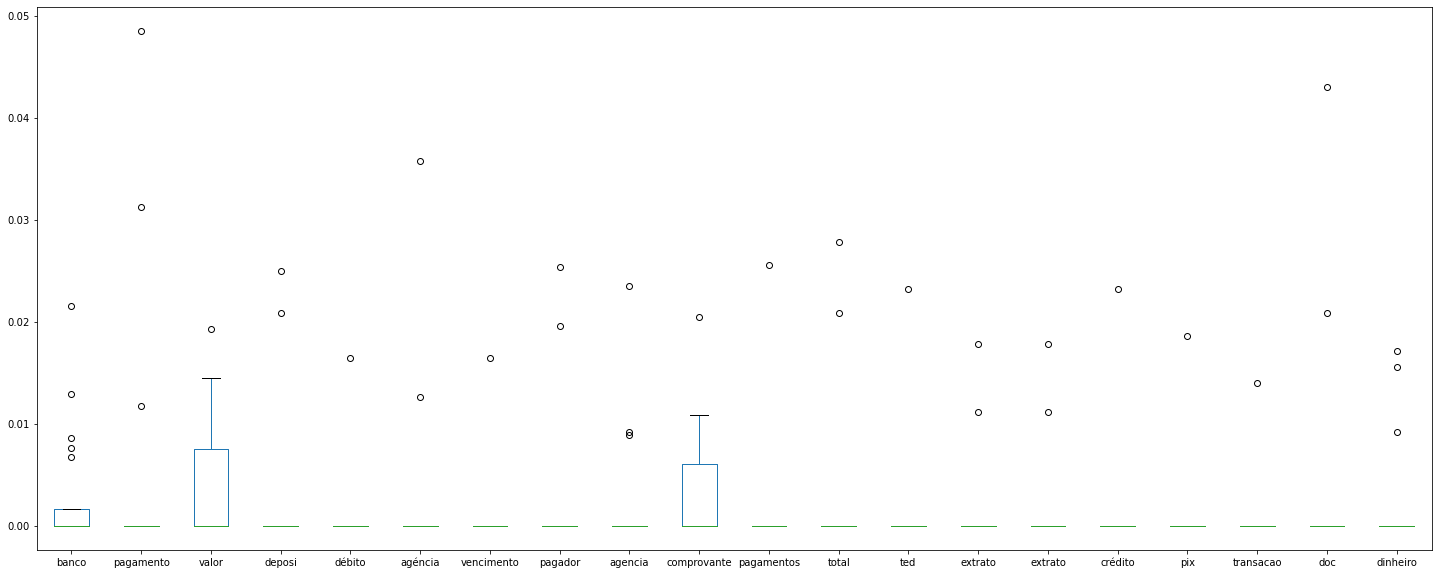

In [33]:
 tfidf_dataframe[['banco','pagamento','valor',
        'deposi','débito','agéncia','vencimento','pagador', 'agencia' 
        ,'comprovante', 'pagamentos','total','ted', 'extrato', 'extrato','crédito',
        'pix', 'transacao', 'doc','dinheiro']].plot(kind = "box", figsize= (25,10))
    

In [135]:
#import seaborn as sns

#sns.pairplot(data = tfidf_cp, hue = "Outcome")

<AxesSubplot:>

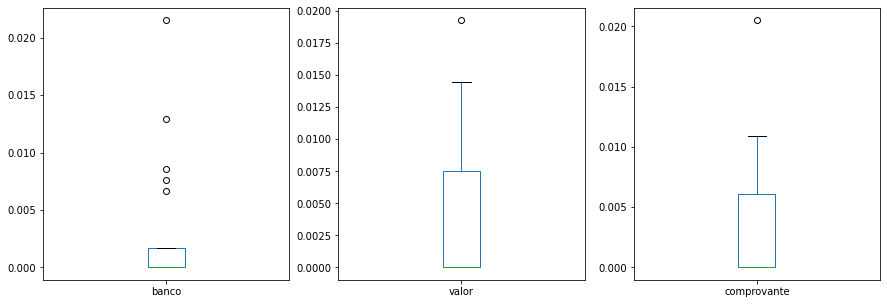

In [29]:
# creating three subplots in the same figure (one row, three columns)
# the axes variable will hold a list with the three subplots for referencing 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings


fig, axes = plt.subplots(1,3, figsize = (15,5))

# plotting a specific series in each element of the axes list
tfidf_dataframe["banco"].plot(kind = "box", ax = axes[0])
tfidf_dataframe["valor"].plot(kind = "box", ax = axes[1])
tfidf_dataframe["comprovante"].plot(kind = "box", ax = axes[2])